### Problem Statement:
The Insurance company that provides health insurance to its customers are now planning to provide vehicle insurance. The company wants to know how many of its customers would be interested in vehicle insurance. 

##### EDA:
Perform EDA to extract valuable insights from the data. 

##### Feature Engineering: 
Perform feature engineering to check which columns play a very important role in model building and try to come up with new features which makes a difference in building the model. 

##### Modelling:
Build a model to come up with a probability score which tells the chances of a person opting for vehicle insurance
    
##### Note:
<b><p> I am still working on the model. Feel free to drop by later for more updates. </p></b>
Consider upvoting if you like my work and if you have any suggestions please drop it in comments. I will take a look at it and work on it. 
     
Thank you!!!

In [49]:
## Importing libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
# Loading the dataset
train_df = pd.read_csv('../input/health-insurance-cross-sell-prediction/train.csv')
test_df = pd.read_csv('../input/health-insurance-cross-sell-prediction/test.csv')

In [3]:
train_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [4]:
test_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


### EDA

In [5]:
## Checking the number of features and instances
train_df.shape

(381109, 12)

In [6]:
## Check for missing values
train_df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

We can infer from above that there are no missing values. 

In [7]:
## Looking at columns
train_df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [8]:
print(train_df["Region_Code"].unique())
print(train_df["Policy_Sales_Channel"].unique())

[28.  3. 11. 41. 33.  6. 35. 50. 15. 45.  8. 36. 30. 26. 16. 47. 48. 19.
 39. 23. 37.  5. 17.  2.  7. 29. 46. 27. 25. 13. 18. 20. 49. 22. 44.  0.
  9. 31. 12. 34. 21. 10. 14. 38. 24. 40. 43. 32.  4. 51. 42.  1. 52.]
[ 26. 152. 160. 124.  14.  13.  30. 156. 163. 157. 122.  19.  22.  15.
 154.  16.  52. 155.  11. 151. 125.  25.  61.   1.  86.  31. 150.  23.
  60.  21. 121.   3. 139.  12.  29.  55.   7.  47. 127. 153.  78. 158.
  89.  32.   8.  10. 120.  65.   4.  42.  83. 136.  24.  18.  56.  48.
 106.  54.  93. 116.  91.  45.   9. 145. 147.  44. 109.  37. 140. 107.
 128. 131. 114. 118. 159. 119. 105. 135.  62. 138. 129.  88.  92. 111.
 113.  73.  36.  28.  35.  59.  53. 148. 133. 108.  64.  39.  94. 132.
  46.  81. 103.  90.  51.  27. 146.  63.  96.  40.  66. 100.  95. 123.
  98.  75.  69. 130. 134.  49.  97.  38.  17. 110.  80.  71. 117.  58.
  20.  76. 104.  87.  84. 137. 126.  68.  67. 101. 115.  57.  82.  79.
 112.  99.  70.   2.  34.  33.  74. 102. 149.  43.   6.  50. 144. 143.
  4

In [9]:
## Segregating columns
numerical_columns = ["Age","Region_Code", "Annual_Premium", "Policy_Sales_Channel", "Vintage"]
categorical_columns = ["Gender","Driving_License", 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage']

In [10]:
train_df[numerical_columns].describe()

,Age,Region_Code,Annual_Premium,Policy_Sales_Channel,Vintage
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,38.822584,26.388807,30564.389581,112.034295,154.347397
std,15.511611,13.229888,17213.155057,54.203995,83.671304
min,20.000000,0.000000,2630.000000,1.000000,10.000000
25%,25.000000,15.000000,24405.000000,29.000000,82.000000
50%,36.000000,28.000000,31669.000000,133.000000,154.000000
75%,49.000000,35.000000,39400.000000,152.000000,227.000000
max,85.000000,52.000000,540165.000000,163.000000,299.000000


##### Checking if the data is skewed. 

<AxesSubplot:xlabel='Response', ylabel='count'>

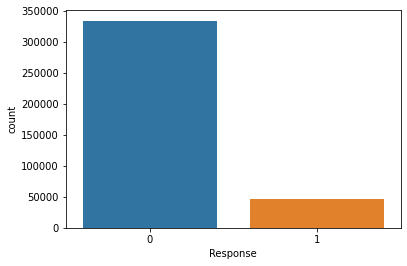

In [11]:
### Checking if the data is skewed. 
sns.countplot(x = train_df["Response"])

From the above plot we can see that the data is skewed. Going forward, we need to implement techniques like random sampling or SMOT analysis to fix this issue. 

##### Gender participation

<AxesSubplot:xlabel='Gender', ylabel='count'>

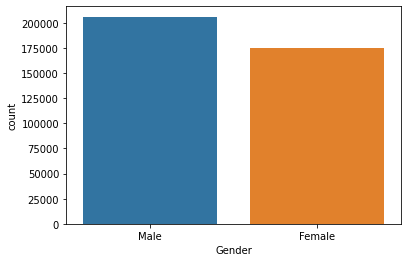

In [12]:
### Gender participation
sns.countplot(x = train_df["Gender"])

##### Gender distribution based on response

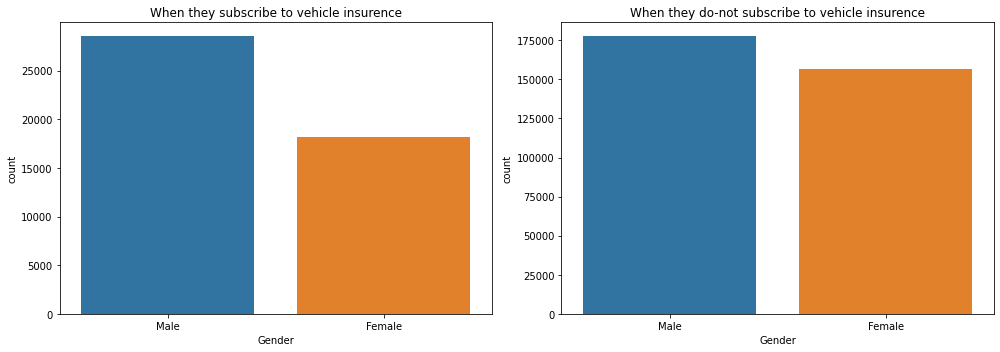

In [13]:
### Gender distribution based on response
fig, axis = plt.subplots(1, 2, figsize = (14, 5))

sns.countplot(ax = axis[0], x = train_df[train_df["Response"] == 1]["Gender"])
axis[0].set_title("When they subscribe to vehicle insurence")

sns.countplot(ax = axis[1], x = train_df[train_df["Response"] == 0]["Gender"])
axis[1].set_title("When they do-not subscribe to vehicle insurence")

fig.tight_layout()

From the above we can see that Male tend to subscribe to vehicle insurence more than female. Therefore we can assume that gender plays an important role in model building. 

##### Analysing Driving liscense

   Gender  Driving_License
0  Female           175020
1    Male           206089


<AxesSubplot:xlabel='Gender', ylabel='Driving_License'>

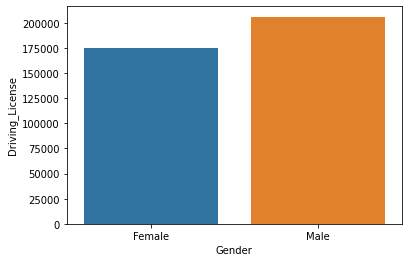

In [14]:
### Analysing Driving liscense
temp = train_df.groupby(["Gender"]).count()["Driving_License"].to_frame().reset_index()
print(temp)
sns.barplot(x = temp["Gender"], y = temp["Driving_License"])

##### Customer previously insured

<AxesSubplot:xlabel='Previously_Insured', ylabel='count'>

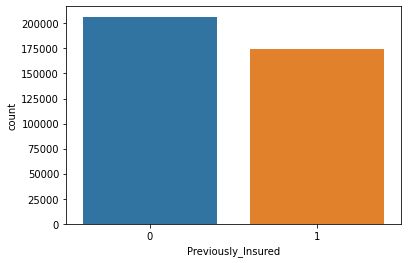

In [15]:
sns.countplot(x = train_df["Previously_Insured"])

Data with respect to customer previously insured is almost equally distributed. 

##### Analysis Vehicle age

<AxesSubplot:xlabel='Vehicle_Age', ylabel='count'>

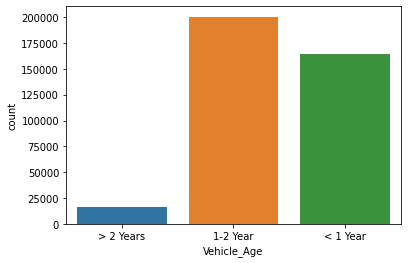

In [16]:
sns.countplot(x = train_df["Vehicle_Age"])

This doesnt tell much about data so I need to check how many opted for insurence with respect to above 3 groups

In [17]:
temp = train_df.groupby(["Vehicle_Age","Response"]).count()["id"].to_frame().reset_index()
temp

,Vehicle_Age,Response,id
0,1-2 Year,0,165510
1,1-2 Year,1,34806
2,< 1 Year,0,157584
3,< 1 Year,1,7202
4,> 2 Years,0,11305
5,> 2 Years,1,4702


The above output doesnt help much as the dataset is highly skewed and number of people without insurence is much higher than the ones with insurence. To make actual sense of the response vs vehicle age, sampling the dataset is required

##### Plotting the count for each group when people have opted for insurence

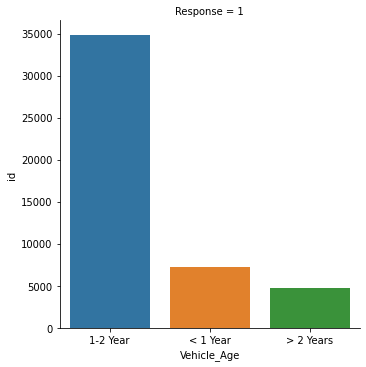

In [18]:
sns.catplot(x = "Vehicle_Age", y="id", col="Response", data=temp[temp["Response"] == 1], kind="bar")

From the above graph we can observe that people tend to take insurence when the age of the vehicle is between 1-2 years. This might be a important factor when building the model. 

But before coming to this conclusion, we need to check the data to see how many records fall under the above 3 groups. If the data for vehicles age between 1-2 years is more than the others then we cant come to the above conclusion. 

##### Analysing Vehicle Age

<AxesSubplot:xlabel='Vehicle_Age', ylabel='count'>

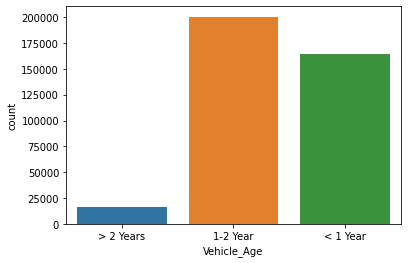

In [19]:
sns.countplot(x = train_df["Vehicle_Age"])

##### Counting number of damaged vehicle

<AxesSubplot:xlabel='Vehicle_Damage', ylabel='count'>

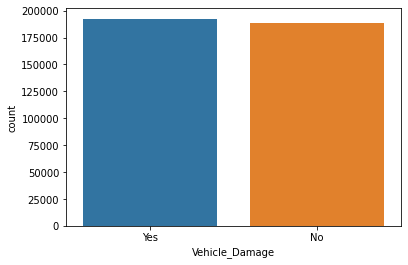

In [20]:
sns.countplot(x = train_df["Vehicle_Damage"])

From the above barplot we can see that equal number of records have damaged and non-damaged vehicles. 

##### Analysing the response of the customers when they have damaged vehicles

In [21]:
temp = train_df.groupby(["Vehicle_Damage","Response"]).count()['id'].to_frame().reset_index()
temp

,Vehicle_Damage,Response,id
0,No,0,187714
1,No,1,982
2,Yes,0,146685
3,Yes,1,45728


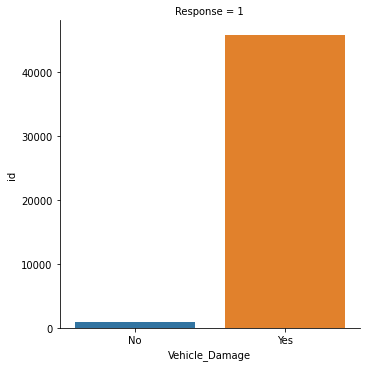

In [22]:
sns.catplot(x="Vehicle_Damage", y="id", col = "Response", data = temp[temp["Response"] == 1], kind = "bar")

From the above we can see that most people who opted for the insurence have damaged there vehicle previously.

##### Analysisng Annual Premium 

<AxesSubplot:xlabel='Annual_Premium', ylabel='Count'>

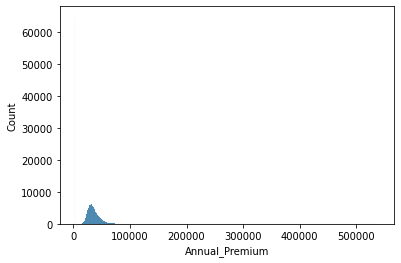

In [23]:
sns.histplot(x = train_df["Annual_Premium"])

### Feature Engineering

##### Correlation plot

<AxesSubplot:title={'center':'Correlation Plot'}>

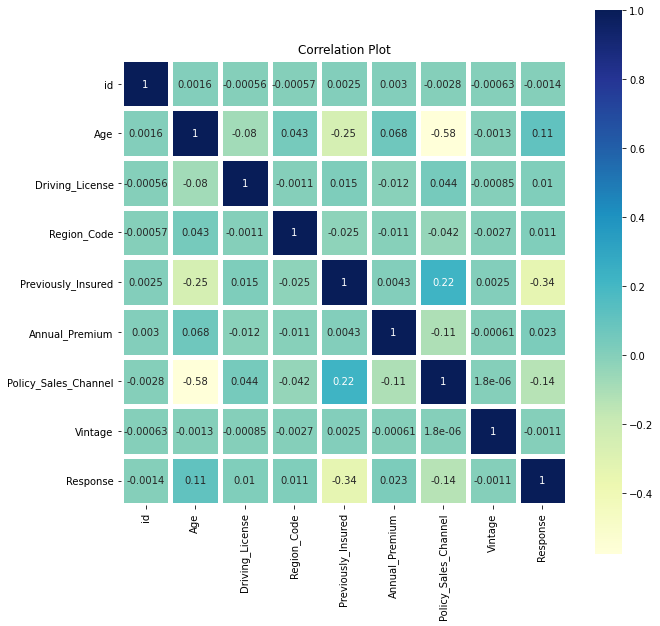

In [24]:
plt.figure(figsize = (10,10))
plt.title("Correlation Plot")
sns.heatmap(train_df.corr(), linewidth = 5, annot = True, square = True, annot_kws={'size': 10}, cmap="YlGnBu")

From the above plot we can see correlation among each features. If two features are highly correlated, we can eleminate one of them because they tend to overfit the data and we also need to make sure to consider all the features that highly correlate with the output so that they help in better prediction. 

##### Converting the data into 0-1 encodings

In [25]:
train_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [26]:
## Reading Continuous and Categorical data
cont = ["Age", "Vintage", "Annual_Premium"]
cat = ["Gender", "Driving_License", "Region_Code", "Previously_Insured", "Vehicle_Age", "Vehicle_Damage"]

In [27]:
train = pd.get_dummies(train_df,drop_first = True)

In [28]:
train.head()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Male,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
0,1,44,1,28.0,0,40454.0,26.0,217,1,1,0,1,1
1,2,76,1,3.0,0,33536.0,26.0,183,0,1,0,0,0
2,3,47,1,28.0,0,38294.0,26.0,27,1,1,0,1,1
3,4,21,1,11.0,1,28619.0,152.0,203,0,1,1,0,0
4,5,29,1,41.0,1,27496.0,152.0,39,0,0,1,0,0


If you observe above, get_dummies only apply for categorical features where number of category is more than 2. If number of categories are two then they will be converted to 0 and 1 and also note that column names will be renamed. 

In [29]:
train.columns
train.columns = ['id', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response',
       'Gender_Male', 'Vehicle_Age__1_Year', 'Vehicle_Age_2_Years',
       'Vehicle_Damage_Yes']

In [30]:
train.head()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Male,Vehicle_Age__1_Year,Vehicle_Age_2_Years,Vehicle_Damage_Yes
0,1,44,1,28.0,0,40454.0,26.0,217,1,1,0,1,1
1,2,76,1,3.0,0,33536.0,26.0,183,0,1,0,0,0
2,3,47,1,28.0,0,38294.0,26.0,27,1,1,0,1,1
3,4,21,1,11.0,1,28619.0,152.0,203,0,1,1,0,0
4,5,29,1,41.0,1,27496.0,152.0,39,0,0,1,0,0


### Modelling

##### Random Sampling the data

In [31]:
# Getting the records which have the value as 1 for response
train_1 = train[train["Response"] == 1]

In [33]:
print(len(train_1))

# Getting the records which have value as 0 fro response
train_0 = train[train["Response"] == 0]

print(len(train_0))

46710
334399


In [34]:
## Getting random samples of train_0 for modelling
train_00 = train_0.sample(n = len(train_1))

In [35]:
len(train_00)

46710

In [36]:
## Appending the two dataframes to have equal number of records when response = 1 and 0
train_sampled = train_1.append(train_00)

In [37]:
len(train_sampled)

93420

##### Scalling the data

In [38]:
train_sampled.head()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Male,Vehicle_Age__1_Year,Vehicle_Age_2_Years,Vehicle_Damage_Yes
0,1,44,1,28.0,0,40454.0,26.0,217,1,1,0,1,1
2,3,47,1,28.0,0,38294.0,26.0,27,1,1,0,1,1
7,8,56,1,28.0,0,32031.0,26.0,72,1,0,0,0,1
10,11,47,1,35.0,0,47576.0,124.0,46,1,0,0,0,1
15,16,37,1,6.0,0,2630.0,156.0,147,1,1,0,0,1


In [39]:
train_sampled = train_sampled.drop(["id"], axis = 1)

In [40]:
train_sampled.head(3)

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Male,Vehicle_Age__1_Year,Vehicle_Age_2_Years,Vehicle_Damage_Yes
0,44,1,28.0,0,40454.0,26.0,217,1,1,0,1,1
2,47,1,28.0,0,38294.0,26.0,27,1,1,0,1,1
7,56,1,28.0,0,32031.0,26.0,72,1,0,0,0,1


In [41]:
train_sampled.columns

Index(['Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response',
       'Gender_Male', 'Vehicle_Age__1_Year', 'Vehicle_Age_2_Years',
       'Vehicle_Damage_Yes'],
      dtype='object')

In [42]:
## Spitting the dataset into features and target variable
X = train_sampled[['Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Gender_Male', 'Vehicle_Age__1_Year', 'Vehicle_Age_2_Years',
       'Vehicle_Damage_Yes']]
y = train_sampled[["Response"]]

In [43]:
## Printing the first 3 rows of X
X.head(3)

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Gender_Male,Vehicle_Age__1_Year,Vehicle_Age_2_Years,Vehicle_Damage_Yes
0,44,1,28.0,0,40454.0,26.0,217,1,0,1,1
2,47,1,28.0,0,38294.0,26.0,27,1,0,1,1
7,56,1,28.0,0,32031.0,26.0,72,0,0,0,1


In [44]:
## printing the first 3 rows of y
y.head(3)

,Response
0,1
2,1
7,1


In [47]:
# Declaring the standard scaler and transforming the dataset 
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [48]:
## Displaying the first 3 rows 
X_scaled[:3]


array([[ 0.22487096,  0.03929129,  0.11418112, -0.60005241,  0.52161641,
        -1.38825872,  0.75136567,  0.86886504, -0.6764052 ,  3.73715894,
         0.6450734 ],
       [ 0.43394395,  0.03929129,  0.11418112, -0.60005241,  0.40160971,
        -1.38825872, -1.51689156,  0.86886504, -0.6764052 ,  3.73715894,
         0.6450734 ],
       [ 1.06116292,  0.03929129,  0.11418112, -0.60005241,  0.05364583,
        -1.38825872, -0.97967274, -1.15092673, -0.6764052 , -0.26758295,
         0.6450734 ]])

##### Train_Test_Split

In [50]:
 X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.33, random_state=42)

##### Building an ANN Model using PyTorch